<a href="https://colab.research.google.com/github/bismark-joe/ML-project_experience/blob/master/Spatial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Necessary Libraries:

In [ ]:
pip install pandas matplotlib

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#First Try with PM2.5

## Load the Data into Python

In [ ]:
drive.mount('/content/drive')

#connecting to the specific folder 'Classroom' where Data is saved on G.Drive.
BASE_DIR = "/content/drive/MyDrive/Classroom"

#Save the Folder as the Base directory where every other file stores
os.chdir(BASE_DIR)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('sahel_pm25.csv', parse_dates=['time']) # Load the PM2.5 data

# Inspect the data
print(df.head())


        time      mean
0 2008-01-01  0.000146
1 2008-02-01  0.000243
2 2008-03-01  0.000224
3 2008-04-01  0.000277
4 2008-05-01  0.000170


In [ ]:
print(df.columns)

df.columns = df.columns.str.strip()



Index(['time', ' mean'], dtype='object')


##Temporal Visualization:

To visualize the trend of PM2.5 over time

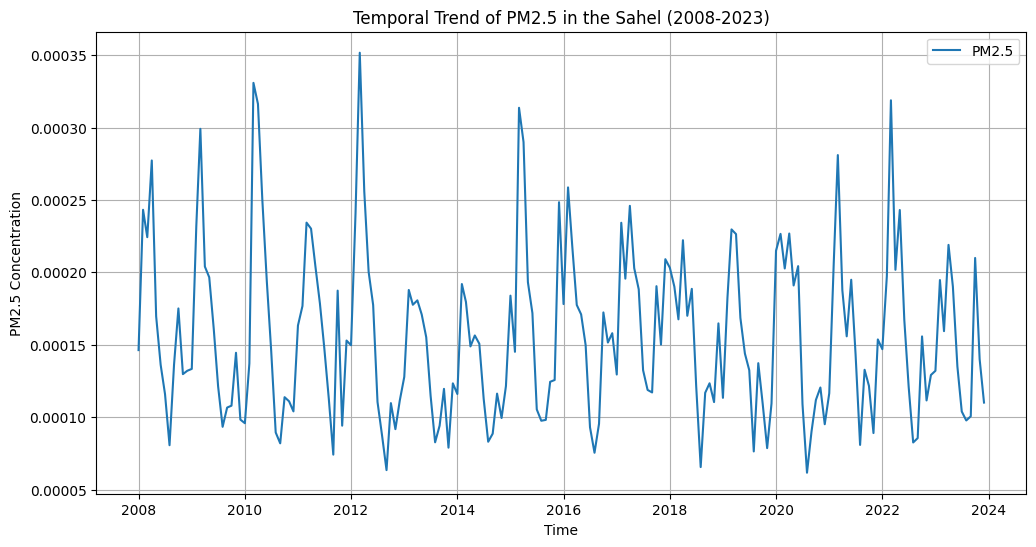

In [ ]:

# Plot PM2.5 over time
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['mean'], label='PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('Temporal Trend of PM2.5 in the Sahel (2008-2023)')
plt.legend()
plt.grid(True)
plt.show()


## Seasonal Pattern Analysis:

We group the data by month to observe any seasonal trends for PM2.5.

In [ ]:
df['month'] = df['time'].dt.month
monthly_mean = df.groupby('month')['mean'].mean()

# Plot seasonal pattern
plt.figure(figsize=(12, 6))
monthly_mean.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 Concentration')
plt.title('Seasonal Pattern of PM2.5 in the Sahel')
plt.grid(True)
plt.show()


#Plotting Different Aerosol Types on the Same Plot


###Load Sahel Region Data

This is another data different from the first data used above. This is Sehel data from google drive conprising of aerosols and enviromental factors



In [ ]:
df = pd.read_csv('aerosol_data.csv') #Loading Sahel Data (aerosols and env factors)

#Preprocess
df.columns = df.columns.str.strip() #This stripped off spaces around the column title

print(df.columns) #Display the all the columns we have in our data

Index(['time', 'PM2.5', 'Organic Carbon', 'Black Carbon', 'AOD',
       'Total_Surf_Precip', 'Humidity', 'Air Temp', 'Precip_Water_Vap',
       'Sur_Wind_Speed', 'Sur_Skin_Temp'],
      dtype='object')


In [ ]:
df.head(10) #Sample of the data

,time,PM2.5,Organic Carbon,Black Carbon,AOD,Total_Surf_Precip,Humidity,Air Temp,Precip_Water_Vap,Sur_Wind_Speed,Sur_Skin_Temp
0,2008-01-01,0.000146,0.000013,1.590000e-06,0.411011,3.530000e-08,0.003638,294.790070,1.960682,7.441326,295.611816
1,2008-02-01,0.000243,0.000008,1.120000e-06,0.841127,4.920000e-08,0.003167,297.915405,1.825566,7.762726,298.755249
2,2008-03-01,0.000224,0.000006,9.260000e-07,0.605673,1.030000e-06,0.004600,303.104279,2.072424,6.364055,304.361969
3,2008-04-01,0.000277,0.000004,6.850000e-07,0.765335,5.350000e-06,0.007128,304.775696,2.522919,5.887045,306.374817
4,2008-05-01,0.000170,0.000005,6.830000e-07,0.402522,1.030000e-05,0.011058,305.782776,3.414948,5.102080,307.672119
5,2008-06-01,0.000136,0.000006,8.370000e-07,0.484325,3.670000e-05,0.013472,304.207611,3.722085,4.925472,305.765533
6,2008-07-01,0.000116,0.000005,8.080000e-07,0.395420,7.040000e-05,0.015914,300.694977,4.443248,4.881212,301.414856
7,2008-08-01,0.000081,0.000005,7.730000e-07,0.237601,8.650000e-05,0.016810,299.349274,5.052749,4.111427,299.743134
8,2008-09-01,0.000136,0.000005,8.310000e-07,0.420969,5.290000e-05,0.016798,299.760040,4.289218,3.868170,299.994965
9,2008-10-01,0.000175,0.000008,1.060000e-06,0.446755,1.670000e-05,0.013261,299.998077,3.003209,4.388778,299.992828


###The trends of each aerosol type over time

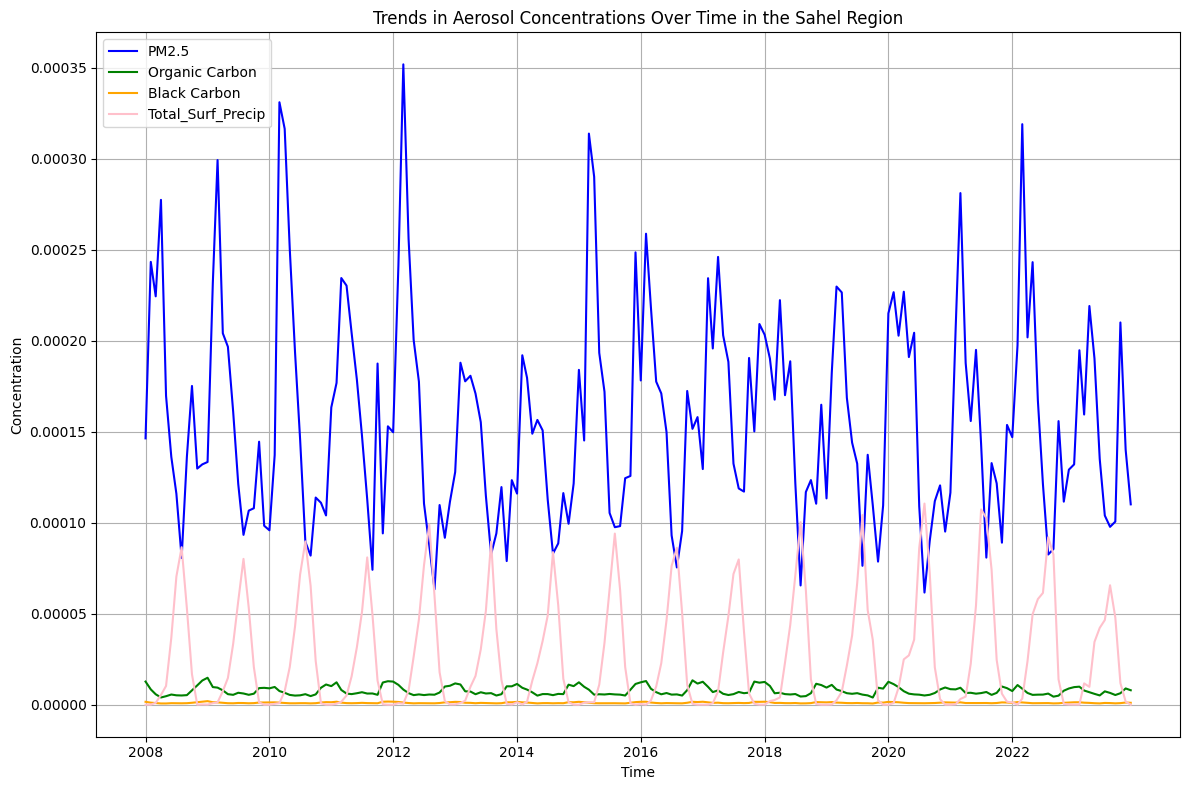

In [ ]:
df['time'] = pd.to_datetime(df['time'])

plt.figure(figsize=(12, 8))

# Plot each aerosol type on the same graph
plt.plot(df['time'], df['PM2.5'], label='PM2.5', color='blue')
plt.plot(df['time'], df['Organic Carbon'], label='Organic Carbon', color='green')
plt.plot(df['time'], df['Black Carbon'], label='Black Carbon', color='orange')
# plt.plot(df['time'], df['AOD'], label='AOD', color='red')

plt.plot(df['time'], df['Total_Surf_Precip'], label='Total_Surf_Precip', color='pink')
# plt.plot(df['time'], df['Humidity'], label='Humidity', color='purple')
# plt.plot(df['time'], df['Air Temp'], label='Air Temp', color='brown')
# plt.plot(df['time'], df['Sur_Wind_Speed'], label='Wind Speed', color='yellow')
# plt.plot(df['time'], df['Sur_Skin_Temp'], label='Skin Temperature', color='gray')
# plt.plot(df['time'], df['Precip_Water_Vap'], label='Precip_Water_Vap', color='cyan')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Trends in Aerosol Concentrations Over Time in the Sahel Region')

# Create a range of years (every 2 years) for the x-axis ticks
years = pd.date_range(start='2008-01-01', end='2024-01-01', freq='2YE').year

# Set xticks with years every 2 years
plt.xticks([pd.Timestamp(str(year)).to_pydatetime() for year in years], [str(year) for year in years], rotation=0)


# Display the legend
plt.legend()
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


###Group Data by Month to Get Seasonal Averages

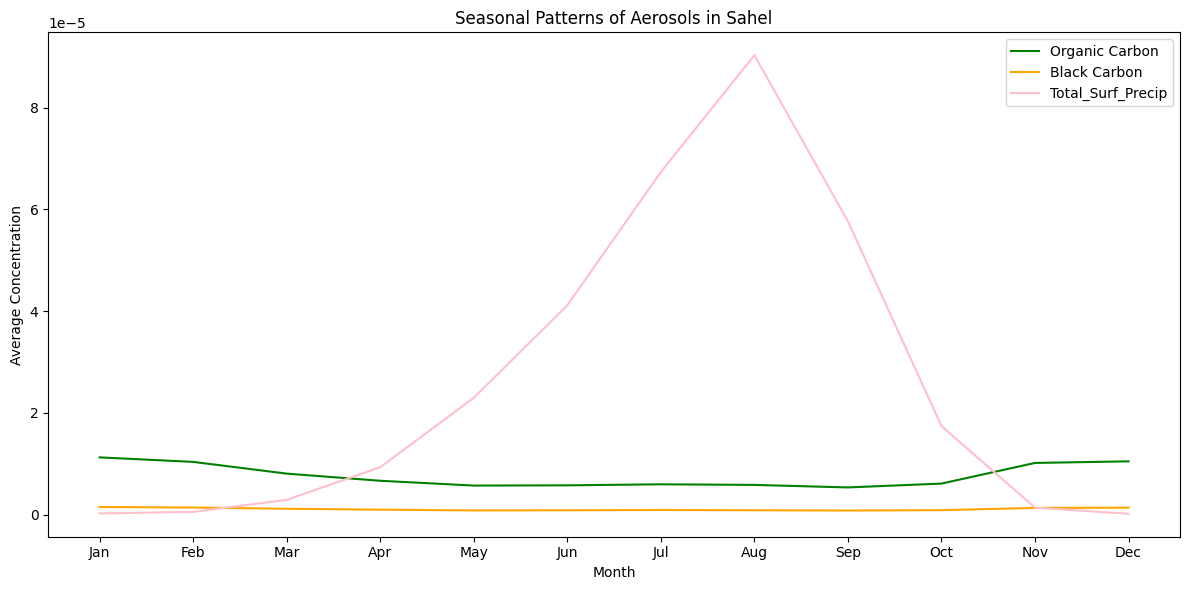

In [ ]:
# Ensure 'time' is in datetime format
df['time'] = pd.to_datetime(df['time'])

# Create a 'month' column by extracting the month from the 'time' column
df['month'] = df['time'].dt.month

# Group by month and calculate the mean
monthly_avg = df.groupby('month').mean()
# Plotting the monthly averages for each aerosol type
plt.figure(figsize=(12, 6))

# plt.plot(monthly_avg.index, monthly_avg['PM2.5'], label='PM2.5', color='blue')
plt.plot(monthly_avg.index, monthly_avg['Organic Carbon'], label='Organic Carbon', color='green')
plt.plot(monthly_avg.index, monthly_avg['Black Carbon'], label='Black Carbon', color='orange')
# plt.plot(monthly_avg.index, monthly_avg['Humidity'], label='Humidity', color='purple')
plt.plot(monthly_avg.index, monthly_avg['Total_Surf_Precip'], label='Total_Surf_Precip', color='pink')
# plt.plot(monthly_avg.index, monthly_avg['Sur_Skin_Temp'], label='Skin Temperature', color='gray')
# plt.plot(monthly_avg.index, monthly_avg['Air Temp'], label='Air Temp', color='brown')
# plt.plot(monthly_avg.index, monthly_avg['Sur_Wind_Speed'], label='Wind Speed', color='yellow')
# plt.plot(monthly_avg.index, monthly_avg['Precip_Water_Vap'], label='Precip_Water_Vap', color='cyan')

plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.title('Seasonal Patterns of Aerosols in Sahel')

plt.legend()
plt.xticks(monthly_avg.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


### Pairwise Scatter Plots

This is for specific pairs of variables to examine the direct relationship between them (e.g., PM2.5 vs. Humidity).

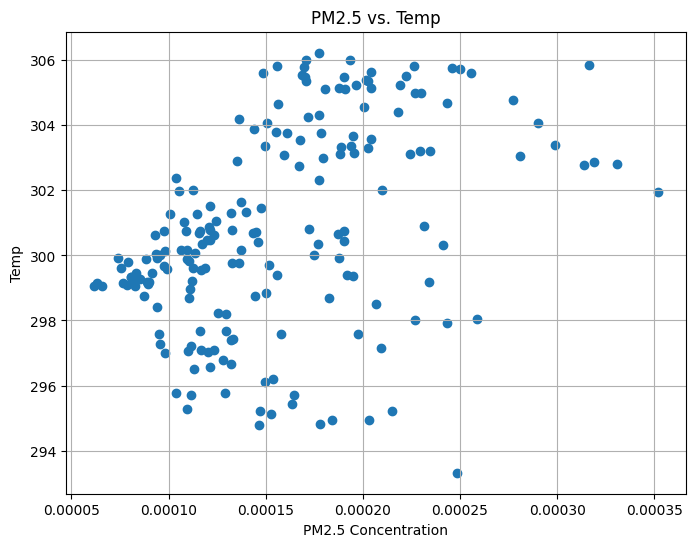

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PM2.5'], df['Air Temp'])
plt.title('PM2.5 vs. Temp')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Temp')
plt.grid(True)
plt.show()


###Scatter Matrix Plot

This shows scatter plots between every pair of variables. It is great for visualizing relationships across different/multiple factors.

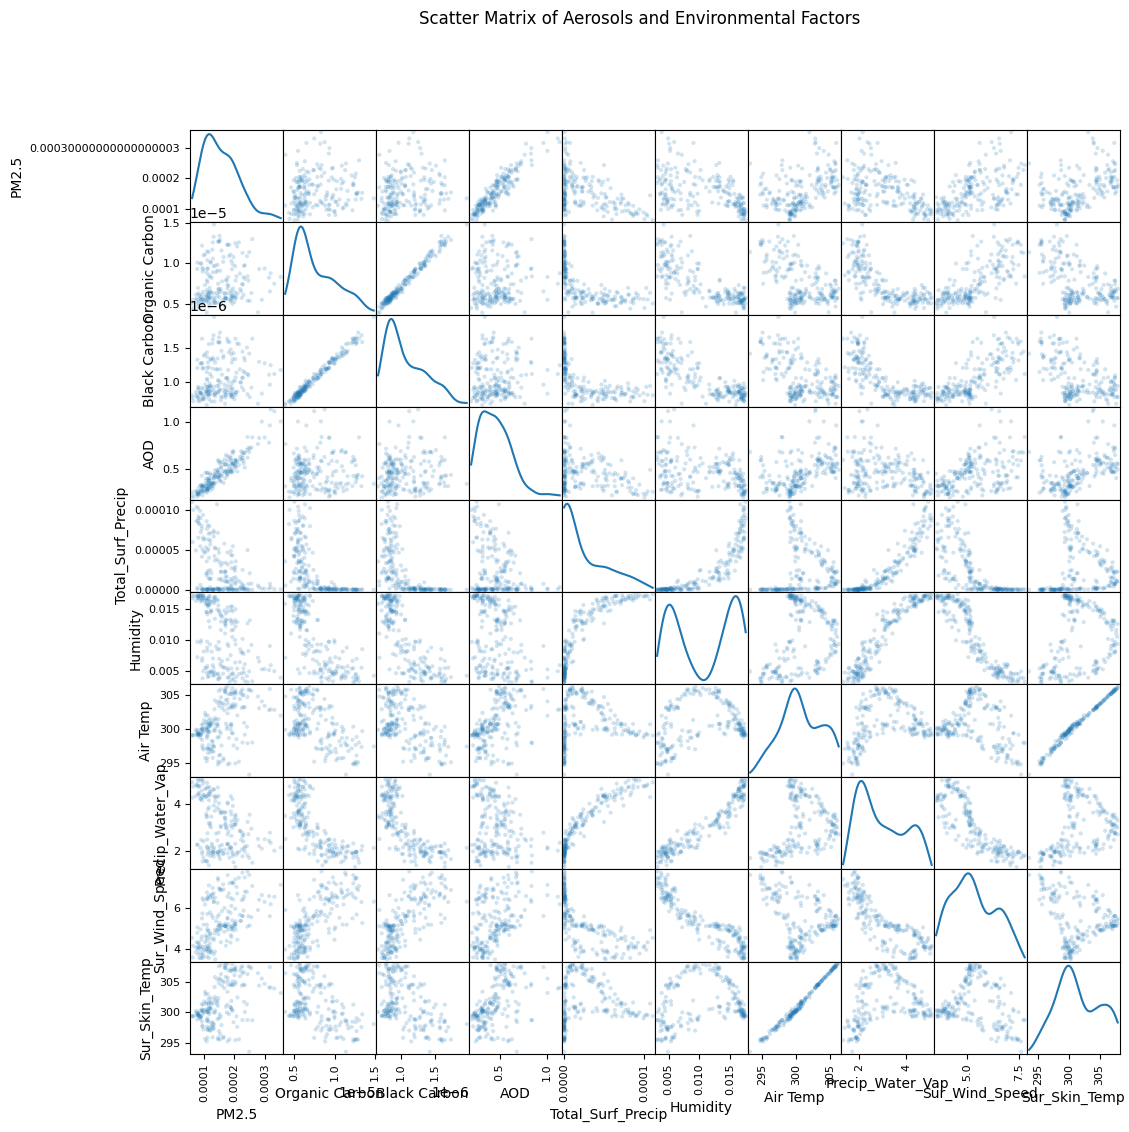

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['PM2.5', 'Organic Carbon', 'Black Carbon', 'AOD',
                   'Total_Surf_Precip', 'Humidity', 'Air Temp',
                   'Precip_Water_Vap', 'Sur_Wind_Speed', 'Sur_Skin_Temp']],
               figsize=(12, 12), diagonal='kde', alpha=0.2)
plt.suptitle('Scatter Matrix of Aerosols and Environmental Factors')
plt.show()


### Correlation Heatmap

A heatmap helps to visualize the correlation between the different variables (aerosols and environmental factors) in a single plot.

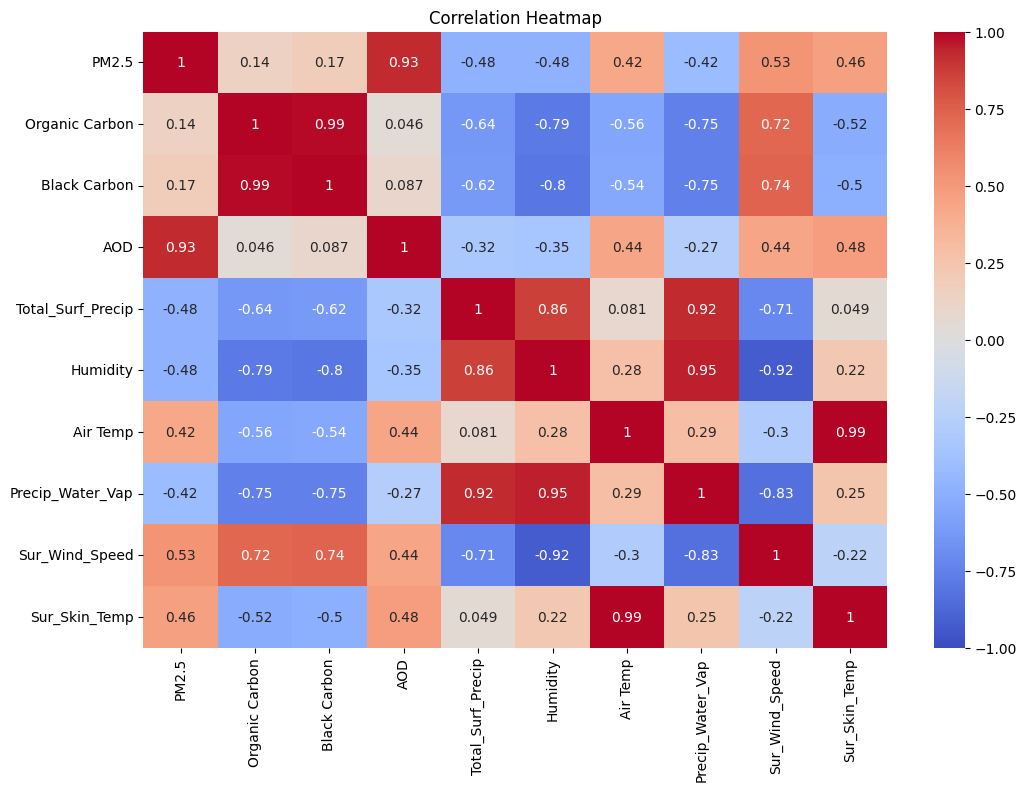

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Since our DataFrame is named 'df'
df_update = df.drop(columns=['time', 'month'])

corr_matrix = df_update.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
